In [ ]:
import os
import json
from tqdm import tqdm
import numpy as np
from LLM_as_judgement import chat_LLM

file_path = "/home/ubuntu/jiaxi/results/Persona_output_Idefics3-8B-Llama3_MMMU_Math/results/biology_answer_Idefics3-8B-Llama3.jsonl"
scores = []
with open(file_path, 'r') as f:
    for line in tqdm(f, total=200, desc=f"Processing {file_path}"):
        data = json.loads(line)
        # user_prompt = data['user_prompt']
        response = data['model_answer']
        print(response)
        
        score = chat_LLM(response)
        print(score)

        # Score是否可以转变成float
        try:
            score = float(score)
        except ValueError:
            score = None

        scores.append(score)
    
    avg_score = np.mean(np.array(scores))
    print(f"Average score for {file_path}: {avg_score}")


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   0%|          | 0/200 [00:00<?, ?it/s]

 These are two green circles with N and S written inside them.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   0%|          | 1/200 [00:02<06:47,  2.05s/it]

0
 1.0.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   1%|          | 2/200 [00:03<04:56,  1.50s/it]

1
 SV.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   2%|▏         | 3/200 [00:04<04:10,  1.27s/it]

0
 Yarn pom pom, slippers, kiwi, tennis ball.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   2%|▏         | 4/200 [00:04<03:30,  1.07s/it]

0
 A blue cube without any text.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   2%|▎         | 5/200 [00:05<03:08,  1.03it/s]

0
 Two brown and white dogs playing with a purple ring on the grass.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   3%|▎         | 6/200 [00:06<03:05,  1.04it/s]

0
 N.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   4%|▎         | 7/200 [00:07<02:55,  1.10it/s]

0
 The sequence of letters is S N S.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   4%|▍         | 8/200 [00:08<03:06,  1.03it/s]

0
 Both pairs of magnets have the same length.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   4%|▍         | 9/200 [00:09<03:14,  1.02s/it]

0
 A picture of a jar of dill pickles.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   5%|▌         | 10/200 [00:10<03:10,  1.00s/it]

0
 The word jam is written on the jar.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   6%|▌         | 11/200 [00:13<05:00,  1.59s/it]

0
 In both Pair 1 and Pair 2, the north pole of one magnet is paired with the south pole of another magnet.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   6%|▌         | 12/200 [00:14<04:32,  1.45s/it]

0
 In both pairs, the north and south poles of the magnets are facing each other.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   6%|▋         | 13/200 [00:15<03:59,  1.28s/it]

0
 Three.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   7%|▋         | 14/200 [00:16<03:29,  1.13s/it]

0
 Both pairs have the same length of 18 mm.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   8%|▊         | 15/200 [00:17<03:14,  1.05s/it]

0
 The image depicts a pair of rain boots. The boots are primarily yellow in color, with a blue band at the top. The top part of the boots is slightly darker, possibly a shade of blue


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   8%|▊         | 16/200 [00:18<03:13,  1.05s/it]

0
 The picture of the water pitcher shows a glass container with a handle and a wide top for pouring.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   8%|▊         | 17/200 [00:19<03:22,  1.11s/it]

0
 A colorful parachute with red, orange, yellow, purple, and pink sections.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:   9%|▉         | 18/200 [00:20<03:06,  1.02s/it]

0
 Quarters.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  10%|▉         | 19/200 [00:21<03:13,  1.07s/it]

0
 The objects in the images are a rubber band, a marshmallow and a balloon.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  10%|█         | 20/200 [00:22<03:01,  1.01s/it]

0
 Viial on the counter, Viial in the refrigerator.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  10%|█         | 21/200 [00:45<22:52,  7.67s/it]

0
 Trumbone


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  11%|█         | 22/200 [00:46<16:36,  5.60s/it]

0
 In the first pair, the north pole of one magnet is touching the south pole of the other magnet. In the second pair, the north pole of one magnet is touching the north pole of the other


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  12%|█▏        | 23/200 [00:48<13:02,  4.42s/it]

0
 Cactus.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  12%|█▏        | 24/200 [00:49<10:10,  3.47s/it]

0
 Dill Pickles


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  12%|█▎        | 25/200 [00:50<07:47,  2.67s/it]

0
 Scarf.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  13%|█▎        | 26/200 [00:50<06:11,  2.14s/it]

0
 The green and purple circles have the same pattern.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  14%|█▎        | 27/200 [00:52<05:12,  1.81s/it]

0
 Both pairs have the same polarity.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  14%|█▍        | 28/200 [00:52<04:25,  1.54s/it]

0
 In the first pair, the first block is blue and the second block is green. In the second pair, the first block is green and the second block is blue.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  14%|█▍        | 29/200 [00:53<03:49,  1.34s/it]

0
 Four images are displayed with text below each image.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  15%|█▌        | 30/200 [00:54<03:28,  1.23s/it]

0
 The letters in the image are "ssss".


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  16%|█▌        | 31/200 [00:56<03:30,  1.24s/it]

0
 The diameter of Pair 2 is 48 mm.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  16%|█▌        | 32/200 [00:58<04:26,  1.59s/it]

0
 Covered aquarium 21.1 16.0, Uncovered aquarium 21.1 16.0.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  16%|█▋        | 33/200 [00:59<03:57,  1.42s/it]

0
 Sample A has a mass of 17 u for each particle and an average particle speed of 1,300 m/s. Sample B has a mass of 30 u for each particle and an average


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  17%|█▋        | 34/200 [01:00<03:28,  1.26s/it]

0
 A yellow, red, and blue inflatable castle can be seen.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  18%|█▊        | 35/200 [01:01<03:12,  1.17s/it]

0
 The diameter of the circle in Pair 2 is larger than the diameter of the circle in Pair 1.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  18%|█▊        | 36/200 [01:02<02:54,  1.06s/it]

0
 10.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  18%|█▊        | 37/200 [01:02<02:36,  1.04it/s]

0
 The picture displays a goldfish in a fish bowl.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  19%|█▉        | 38/200 [01:03<02:40,  1.01it/s]

0
 Two objects are labeled with a rock and a velcro.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  20%|█▉        | 39/200 [01:04<02:27,  1.09it/s]

0
 In the given image, there are two pairs of magnets, each consisting of two magnets labeled as "N" and "S" (North and South poles). The magnets in each pair are arranged in


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  20%|██        | 40/200 [01:05<02:37,  1.02it/s]

0
 A daffodil is labeled as flower petals.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  20%|██        | 41/200 [01:06<02:33,  1.03it/s]

0
 In the first pair, the first shape is a 3 inch side square and the second shape is a 2 inch side square.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  21%|██        | 42/200 [01:07<02:38,  1.00s/it]

0
 Rubber ball, spring, inflatable castle.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  22%|██▏       | 43/200 [01:08<02:23,  1.09it/s]

0
 In pair 1, the first magnet is north and the second magnet is south. In pair 2, the first magnet is north and the second magnet is south.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  22%|██▏       | 44/200 [01:09<02:24,  1.08it/s]

0
 The shoes in the picture are made of leather.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  22%|██▎       | 45/200 [01:10<02:25,  1.06it/s]

0
 In pair 1, the first magnet is pointing north and the second magnet is pointing south. In pair 2, the first magnet is pointing north and the second magnet is pointing south.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  23%|██▎       | 46/200 [01:11<02:17,  1.12it/s]

0
 The graph shows the magnetic force between two magnets in newtons for two different pairs of magnets. The magnetic force between the magnets in both pairs is 17.4 newtons.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  24%|██▎       | 47/200 [01:12<02:19,  1.09it/s]

0
 3 red dice with white pips.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  24%|██▍       | 48/200 [01:13<02:17,  1.10it/s]

0
 In both pairs, the first and third objects are the same color.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  24%|██▍       | 49/200 [01:14<02:20,  1.07it/s]

0
 The water in a waterfall is a liquid.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  25%|██▌       | 50/200 [01:15<02:20,  1.07it/s]

0
 Sample A has a mass of 16 u for each particle and an average particle speed of 1,900 m/s. Sample B has a mass of 28 u for each particle and an average


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  26%|██▌       | 51/200 [01:15<02:13,  1.12it/s]

0
 A person is holding a screwdriver that is driving nails into a piece of wood.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  26%|██▌       | 52/200 [01:16<02:10,  1.14it/s]

0
 A slide is yellow in color.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  26%|██▋       | 53/200 [01:17<02:12,  1.11it/s]

0
 Wool hat, balloon, bubble gum.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  27%|██▋       | 54/200 [01:20<03:44,  1.54s/it]

0
 Sample A has a higher average particle speed than Sample B.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  28%|██▊       | 55/200 [01:21<03:20,  1.38s/it]

0
 The text states that the magnets will attract or repel each other.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  28%|██▊       | 56/200 [01:22<03:00,  1.25s/it]

0
 The bar graph shows the number of pink and green segments in two pairs of magnets. Pair 1 has two pink segments and two green segments. Pair 2 has two pink segments and two green segments


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  28%|██▊       | 57/200 [01:24<03:06,  1.31s/it]

0
 In pair 1, the first block is green and the second block is pink. In pair 2, the first block is pink and the second block is green.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  29%|██▉       | 58/200 [01:24<02:49,  1.19s/it]

0
 A knife with a handle that has the number 9 on it.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  30%|██▉       | 59/200 [01:25<02:36,  1.11s/it]

0
 Chocolate milkshake, rainbow sucker, honey.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  30%|███       | 60/200 [01:26<02:33,  1.09s/it]

0
 A red thread is on a tan spool.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  30%|███       | 61/200 [01:27<02:24,  1.04s/it]

0
 The following are the number of tomes in the library: 1000, 1000, 1000, 1000, 1000, 1000, 1000,


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  31%|███       | 62/200 [01:28<02:23,  1.04s/it]

0
 A picture of a cookie with sprinkles being poured on top of it.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  32%|███▏      | 63/200 [01:30<02:30,  1.10s/it]

0
 In pair 1, there are 3 green blocks and 2 pink blocks. In pair 2, there are 3 pink blocks and 2 green blocks.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  32%|███▏      | 64/200 [01:31<02:26,  1.08s/it]

0
 A grocery bag is shown with no writing on it.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  32%|███▎      | 65/200 [01:32<02:18,  1.03s/it]

0
 A spatula that is yellow and brown in color.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  33%|███▎      | 66/200 [01:33<02:13,  1.00it/s]

0
 A 300ml glass flask is half empty.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  34%|███▎      | 67/200 [01:33<02:08,  1.03it/s]

0
 Rubber gloves and rain boots are yellow.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  34%|███▍      | 68/200 [01:34<02:01,  1.09it/s]

0
 Sample A has a mass of 28 u for each particle and an average particle speed of 1300 m/s. Sample B has a mass of 44 u for each particle and an average particle


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  34%|███▍      | 69/200 [01:36<02:22,  1.09s/it]

0
 The words on the left are called "tissue" and the words on the right are called "track suit".


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  35%|███▌      | 70/200 [01:37<02:13,  1.02s/it]

0
 The number 2 is not present in the image.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  36%|███▌      | 71/200 [01:38<02:18,  1.07s/it]

0
 The first pair has two south poles and the second pair has two north poles.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  36%|███▌      | 72/200 [01:39<02:08,  1.00s/it]

0
 The colors in the image are pink and blue.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  36%|███▋      | 73/200 [01:39<02:02,  1.03it/s]

0
 The following table shows the initial and final temperatures of salmon fillets cooked on a grill.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  37%|███▋      | 74/200 [01:40<01:54,  1.10it/s]

0
 A log is a type of tree trunk.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  38%|███▊      | 75/200 [01:41<01:48,  1.15it/s]

0



Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  38%|███▊      | 76/200 [01:42<01:51,  1.11it/s]

0
 A teapot with a pink handle and flowers on it.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  38%|███▊      | 77/200 [01:43<02:04,  1.01s/it]

0
 Soccer shorts, sapphire, blueberry.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  39%|███▉      | 78/200 [01:45<02:28,  1.22s/it]

0
 Sample A has a higher average particle speed than Sample B.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  40%|███▉      | 79/200 [01:46<02:14,  1.11s/it]

0
 The first two pairs have a diameter of 0.7 cm and the last pair has a diameter of 0.9 cm.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  40%|████      | 80/200 [01:47<02:15,  1.13s/it]

0
 M S M.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  40%|████      | 81/200 [01:50<03:29,  1.76s/it]

0
 The length of the first pair of magnets is 3.5 inches and the length of the second pair of magnets is 3.5 inches.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  41%|████      | 82/200 [01:51<02:54,  1.48s/it]

0
 A bridge is in the image.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  42%|████▏     | 83/200 [01:53<03:18,  1.70s/it]

0
 The diagram shows the distance between the north and south poles of two different bar magnets. Which bar magnet in the diagram has the stronger magnetic force?


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  42%|████▏     | 84/200 [01:54<02:51,  1.48s/it]

0
 A pink dress is on the picture with the word dress written below it.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  42%|████▎     | 85/200 [01:55<02:33,  1.34s/it]

0
 Sample A has a mass of 34 u for each particle and an average particle speed of 1,000 m/s. Sample B has a mass of 40 u for each particle and an average


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  43%|████▎     | 86/200 [01:56<02:18,  1.21s/it]

0
 The graph shows the number of pairs of magnets with a certain magnetic force. The x-axis shows the magnetic force in inches. The y-axis shows the number of pairs. For each magnetic force, there


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  44%|████▎     | 87/200 [01:58<02:35,  1.37s/it]

0
 NS.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  44%|████▍     | 88/200 [01:59<02:33,  1.37s/it]

0
 The diameter of the first and second pair is 3.75 in.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  44%|████▍     | 89/200 [02:00<02:23,  1.29s/it]

0
 Which one has a sucker on it?


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  45%|████▌     | 90/200 [02:01<02:08,  1.17s/it]

0



Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  46%|████▌     | 91/200 [02:02<01:52,  1.03s/it]

0
 Sample A has a higher average particle speed than Sample B.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  46%|████▌     | 92/200 [02:03<01:46,  1.02it/s]

0
 There are numbers 30 green circles and 30 black arrows in the image.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  46%|████▋     | 93/200 [02:04<01:43,  1.04it/s]

0
 The text does not provide information about the average particle speed for Sample A.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  47%|████▋     | 94/200 [02:05<01:39,  1.06it/s]

1
 In both pairs, the south pole of one magnet is attracted to the north pole of the other magnet.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  48%|████▊     | 95/200 [02:06<01:46,  1.01s/it]

0
 Stuffed dice, kiwi, slippers


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  48%|████▊     | 96/200 [02:07<01:44,  1.01s/it]

0
 The image on the left is a gold nugget, and the image on the right is a glass of lemonade.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  48%|████▊     | 97/200 [02:08<01:44,  1.01s/it]

0
 A clipboard with a brown board and silver clip.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  49%|████▉     | 98/200 [02:09<01:45,  1.03s/it]

0
 36 u.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  50%|████▉     | 99/200 [02:10<01:37,  1.03it/s]

0
 The image depicts a clay flowerpot. The flowerpot is a simple, unadorned, and cylindrical vessel made from clay. It has a smooth, rounded shape with a slightly flared mouth


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  50%|█████     | 100/200 [02:11<01:34,  1.06it/s]

0
 Sample A has a higher average particle speed than Sample B.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  50%|█████     | 101/200 [02:12<01:51,  1.13s/it]

0
 Both pairs have the same length of 4 cm.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  51%|█████     | 102/200 [02:13<01:41,  1.03s/it]

0



Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  52%|█████▏    | 103/200 [02:14<01:42,  1.06s/it]

0
 The bar graph shows the number of pink and green segments in two pairs of magnets. Pair 1 has two pink segments and two green segments. Pair 2 has two pink segments and two green segments


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  52%|█████▏    | 104/200 [02:15<01:34,  1.02it/s]

0
 A picture of a pineapple with the word "pineapple" below it.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  52%|█████▎    | 105/200 [02:17<01:57,  1.24s/it]

0
 The numbers in both pairs add up to 19.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  53%|█████▎    | 106/200 [02:18<02:02,  1.30s/it]

0
 Feather is a type of what?


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  54%|█████▎    | 107/200 [02:21<02:41,  1.74s/it]

0
 A knife with a handle and a blade.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  54%|█████▍    | 108/200 [02:22<02:16,  1.49s/it]

0
 A little girl in a pink and white top is holding open a window.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  55%|█████▍    | 109/200 [02:24<02:19,  1.54s/it]

0
 The image depicts a collection of crayons arranged in a somewhat scattered and overlapping manner. There are a total of nine crayons, each with distinct colors and unique patterns. Here is a detailed description of


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  55%|█████▌    | 110/200 [02:25<02:06,  1.40s/it]

0
 The first and third pairs of the image have the same pattern. The second pair has a different pattern.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  56%|█████▌    | 111/200 [02:25<01:47,  1.21s/it]

0
 A log is a type of tree trunk.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  56%|█████▌    | 112/200 [02:27<01:59,  1.36s/it]

0
 The graph shows the number of pairs of socks in inches. Pair 1 has a blue sock that is 4.75 inches and a green sock that is 4.75 inches. Pair 


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  56%|█████▋    | 113/200 [02:30<02:43,  1.87s/it]

0
 The initial temperature of the refrigerator with its door open was 3.8 degrees celsius and the final temperature was 11.8 degrees celsius. The initial temperature of the refrigerator with its door


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  57%|█████▋    | 114/200 [02:31<02:14,  1.56s/it]

0
 A red balloon is in the image.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  57%|█████▊    | 115/200 [02:32<01:51,  1.32s/it]

0
 The word "ss" is repeated.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  58%|█████▊    | 116/200 [02:33<01:46,  1.27s/it]

0
 Two balls are shown with different colors and textures.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  58%|█████▊    | 117/200 [02:34<01:42,  1.23s/it]

0
 A simple image of a canoe.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  59%|█████▉    | 118/200 [02:35<01:34,  1.15s/it]

0
 4.0.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  60%|█████▉    | 119/200 [02:36<01:29,  1.10s/it]

0
 In the given image, there are two pairs of magnets, each labeled as Pair 1 and Pair 2. Each pair consists of two magnets, one labeled as "S" and the other labeled


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  60%|██████    | 120/200 [02:37<01:26,  1.08s/it]

0
 The first pair has two green circles with a diameter of 44 mm and two purple circles with a diameter of 44 mm. The second pair has two green circles with a diameter of 44 mm


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  60%|██████    | 121/200 [02:38<01:21,  1.03s/it]

0
 In pair 1, there are 3 blue segments and 2 green segments. In pair 2, there are 3 green segments and 2 blue segments.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  61%|██████    | 122/200 [02:39<01:19,  1.02s/it]

0
 A cartoon image of a person with a red and white headband is sweating.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  62%|██████▏   | 123/200 [02:45<03:08,  2.45s/it]

0
 Ceramic mug.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  62%|██████▏   | 124/200 [02:46<02:34,  2.04s/it]

0
 The table shows the temperature of greenhouses with and without solar panels. The temperature of a greenhouse with solar panels is 8 degrees Celsius higher than the temperature of a greenhouse without solar panels. The temperature


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  62%|██████▎   | 125/200 [02:47<02:10,  1.73s/it]

0
 A wooden door with 6 panels and a silver doorknob.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  63%|██████▎   | 126/200 [02:48<01:47,  1.45s/it]

0
 Four.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  64%|██████▎   | 127/200 [02:49<01:34,  1.29s/it]

0
 Jello.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  64%|██████▍   | 128/200 [02:50<01:28,  1.23s/it]

0
 A decorative plate with a golden outline and a blank space in the middle.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  64%|██████▍   | 129/200 [02:51<01:24,  1.19s/it]

0
 Sample A has a mass of 26u for each particle and an average particle speed of 1,100 m/s. Sample B has a mass of 32u for each particle and an average


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  65%|██████▌   | 130/200 [02:52<01:15,  1.08s/it]

0
 S.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  66%|██████▌   | 131/200 [02:54<01:42,  1.49s/it]

0
 S.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  66%|██████▌   | 132/200 [02:55<01:36,  1.42s/it]

0



Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  66%|██████▋   | 133/200 [02:56<01:23,  1.25s/it]

0
 The image depicts a bunch of balloons held by a pair of hands. The balloons are of various colors, including red, blue, pink, and purple. The balloons are of different sizes, with some


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  67%|██████▋   | 134/200 [02:57<01:16,  1.16s/it]

0
 Cracker.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  68%|██████▊   | 135/200 [02:58<01:13,  1.13s/it]

0
 The lengths of the magnets in Pair 1 is 9.9 cm.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  68%|██████▊   | 136/200 [02:59<01:09,  1.08s/it]

0
 In pair 1, there are 2 green blocks and 2 purple blocks. In pair 2, there are 3 green blocks and 2 purple blocks.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  68%|██████▊   | 137/200 [03:00<01:07,  1.07s/it]

0
 The lengths of the magnetic forces in Pair 1 and Pair 2 are 18.2 mm and 42 mm, respectively.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  69%|██████▉   | 138/200 [03:01<01:05,  1.06s/it]

0
 A shovel is shown with a wooden handle and a metal scoop.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  70%|██████▉   | 139/200 [03:02<01:00,  1.00it/s]

0
 The diagram shows two pairs of scissors. Pair 1 has a purple blade and a green handle, while Pair 2 has a green blade and a purple handle.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  70%|███████   | 140/200 [03:03<00:59,  1.01it/s]

0
 Caramel corn and chocolate milkshake are in the image.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  70%|███████   | 141/200 [03:04<00:55,  1.06it/s]

0
 Which picture has the word crayons under it?


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  71%|███████   | 142/200 [03:05<01:04,  1.11s/it]

0
 In pair 1, the first magnet is north and the second magnet is south. In pair 2, the first magnet is north and the second magnet is south.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  72%|███████▏  | 143/200 [03:07<01:16,  1.35s/it]

0
 The image depicts two samples, labeled Sample A and Sample B, each contained within a jar. Both jars have a similar shape and size, with a cylindrical body and a lid. The jars are filled


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  72%|███████▏  | 144/200 [03:08<01:06,  1.19s/it]

0
 The first pair has a diameter of 31.8 mm and the second pair has a diameter of 31.8 mm. The first pair is larger than the second pair.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  72%|███████▎  | 145/200 [03:09<01:03,  1.15s/it]

0
 Melted marshmallow, candy sprinkles, ice cream sundae.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  73%|███████▎  | 146/200 [03:10<00:57,  1.06s/it]

0
 11.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  74%|███████▎  | 147/200 [03:11<00:59,  1.13s/it]

1
 S.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  74%|███████▍  | 148/200 [03:12<00:52,  1.01s/it]

0
 Jello, Ocean Water, Marbles, Icicle.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  74%|███████▍  | 149/200 [03:13<00:51,  1.01s/it]

0
 The word contains only vowels.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  75%|███████▌  | 150/200 [03:14<00:51,  1.03s/it]

0
 The four pairs of magnets have the following polarities: SS, NN, SS, NN.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  76%|███████▌  | 151/200 [03:15<00:48,  1.02it/s]

0
 Rock.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  76%|███████▌  | 152/200 [03:16<00:51,  1.08s/it]

0
 In the given image, there are two pairs of magnets, each consisting of two magnets labeled as "S" and "N" (presumably for south and north poles). The magnets in each pair


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  76%|███████▋  | 153/200 [03:17<00:49,  1.06s/it]

0
 A picture of a burlap sack is labeled as a 'potato sack'.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  77%|███████▋  | 154/200 [03:21<01:28,  1.92s/it]

0
 The lengths of the diameters of the diamonds in both pairs are 0.5 cm.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  78%|███████▊  | 155/200 [03:24<01:32,  2.06s/it]

0
 No.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  78%|███████▊  | 156/200 [03:25<01:20,  1.83s/it]

1
 A paintbrush with red paint is above a red stain.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  78%|███████▊  | 157/200 [03:27<01:17,  1.80s/it]

0
 Sample A has a higher average particle speed than Sample B.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  79%|███████▉  | 158/200 [03:28<01:05,  1.57s/it]

0
 A pizza is being held up by four people above a table with salt and pepper shakers and glasses.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  80%|███████▉  | 159/200 [03:29<01:01,  1.51s/it]

0
 The average kinetic energy of the particles in Sample A is higher than the average kinetic energy of the particles in Sample B.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  80%|████████  | 160/200 [03:30<00:54,  1.36s/it]

0
 The second pair has a length of 6.9 mm.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  80%|████████  | 161/200 [03:31<00:49,  1.28s/it]

0
 Wet ice cube, water slide, wet paint, yogurt.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  81%|████████  | 162/200 [03:32<00:44,  1.16s/it]

0
 A black bicycle tire with 16 spokes.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  82%|████████▏ | 163/200 [03:33<00:37,  1.02s/it]

0
 The image contains a green background with a white horizontal stripe in the middle. The stripe is divided into two equal parts by a vertical white line. The top and bottom parts of the image are also green


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  82%|████████▏ | 164/200 [03:34<00:35,  1.01it/s]

0
 The image depicts a cartoon illustration of a serving of French fries. The fries are depicted in a red and white striped paper container, which is commonly used for serving fast food items. The fries are golden


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  82%|████████▎ | 165/200 [03:35<00:34,  1.01it/s]

0
 All of the pairs have the same color scheme.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  83%|████████▎ | 166/200 [03:36<00:35,  1.04s/it]

0
 The magnetic force between the magnets in each pair is strong.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  84%|████████▎ | 167/200 [03:38<00:43,  1.32s/it]

0
 A pipe.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  84%|████████▍ | 168/200 [03:38<00:37,  1.16s/it]

0
 The table shows the initial and final temperatures of two bottles. The brown bottle was heated from 19 degrees Celsius to 25 degrees Celsius, and the clear bottle was heated from 19 degrees Celsius to


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  84%|████████▍ | 169/200 [03:39<00:34,  1.11s/it]

0
 Which of these things is made from tree bark
Answer: tree bark.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  85%|████████▌ | 170/200 [03:40<00:32,  1.08s/it]

0
 The words on the left picture is chalk and the right picture is lemonade.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  86%|████████▌ | 171/200 [03:41<00:30,  1.06s/it]

0
 A picture of honey with a dipper is shown.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  86%|████████▌ | 172/200 [04:08<04:07,  8.84s/it]

0
 The average particle speed in Sample A is 1,700 m/s and the average particle speed in Sample B is 1,700 m/s.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  86%|████████▋ | 173/200 [04:11<03:10,  7.05s/it]

0
 A woman in a blue Daizle shirt heads toward a soccer ball.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  87%|████████▋ | 174/200 [04:12<02:17,  5.27s/it]

0
 Both Pair 1 and Pair 2 have the same number of S and N segments.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  88%|████████▊ | 175/200 [04:13<01:38,  3.95s/it]

0
 The text in the image does not contain any information about the color of the magnets.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  88%|████████▊ | 176/200 [04:14<01:13,  3.05s/it]

1
 The first and second pair have the same arrangement of north and south poles.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  88%|████████▊ | 177/200 [04:16<00:58,  2.55s/it]

0
 In pair 1, there are 2 purple blocks and 2 green blocks. In pair 2, there are 3 purple blocks and 2 green blocks.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  89%|████████▉ | 178/200 [04:17<00:45,  2.09s/it]

0
 The word wet is in the image.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  90%|████████▉ | 179/200 [04:18<00:37,  1.77s/it]

0
 The first pair is made up of a blue segment that is labeled 0.25 in and a green segment that is labeled 0.25 in. The second pair is made up of a blue


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  90%|█████████ | 180/200 [04:19<00:29,  1.49s/it]

0
 S


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  90%|█████████ | 181/200 [04:20<00:25,  1.33s/it]

0
 In pair 1, the first magnet is north and the second magnet is south. In pair 2, the first magnet is north and the second magnet is south.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  91%|█████████ | 182/200 [04:20<00:21,  1.21s/it]

0
 The image depicts a metal paper clip. The paper clip is a common office supply item used for holding together sheets of paper. It is made of metal, typically stainless steel or another durable material, and


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  92%|█████████▏| 183/200 [04:21<00:18,  1.09s/it]

0
 Choose either wool hat or trampoline.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  92%|█████████▏| 184/200 [04:22<00:17,  1.09s/it]

0
 Honey, bubble gum, tape


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  92%|█████████▎| 185/200 [04:24<00:17,  1.19s/it]

0
 The numbers in the image indicate the thickness of the magnets in millimeters.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  93%|█████████▎| 186/200 [04:27<00:26,  1.86s/it]

0
 The words on the left are track suit and the words on the right are rain boots.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  94%|█████████▎| 187/200 [04:28<00:20,  1.59s/it]

0
 A yellow lemon is on the image.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  94%|█████████▍| 188/200 [04:29<00:16,  1.39s/it]

0
 All four pairs have the same magnetic force.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  94%|█████████▍| 189/200 [04:30<00:13,  1.26s/it]

0
 The first pair of N is 0.15 cm by 0.15 cm. The second pair of N is 0.15 cm by 0.15 cm.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  95%|█████████▌| 190/200 [04:31<00:11,  1.15s/it]

0
 The colors in the image are pink, white, and blue.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  96%|█████████▌| 191/200 [04:32<00:09,  1.04s/it]

0
 The first pair of magnets is labeled "3 in" and the second pair of magnets is also labeled "3 in".


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  96%|█████████▌| 192/200 [04:32<00:07,  1.05it/s]

0
 In both pairs, the first and second magnets are the same color and the third and fourth magnets are the same color.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  96%|█████████▋| 193/200 [04:33<00:06,  1.08it/s]

0
 A gold ring.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  97%|█████████▋| 194/200 [04:34<00:05,  1.09it/s]

0
 In the given image, there are two pairs of magnets, each consisting of two magnets labeled as "S" and "N" (presumably for south and north poles). The magnets in each pair


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  98%|█████████▊| 195/200 [04:35<00:04,  1.05it/s]

0
 Four objects are shown and labeled with a word. Which object does not belong with the other three?


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  98%|█████████▊| 196/200 [04:36<00:03,  1.11it/s]

0
 In both pairs, the north and south poles of the magnets are facing each other.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  98%|█████████▊| 197/200 [04:37<00:02,  1.02it/s]

0
 Sample A has a mass of 4.0 u for each particle and an average particle speed of 1.10 m/s. Sample B has a mass of 4.6 u for each


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl:  99%|█████████▉| 198/200 [04:38<00:01,  1.02it/s]

0
 SS.


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl: 100%|█████████▉| 199/200 [04:39<00:00,  1.11it/s]

0
 In the first pair, the north pole of one magnet is touching the south pole of the other magnet. In the second pair, the north pole of one magnet is touching the north pole of the other


Processing /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl: 100%|██████████| 200/200 [04:40<00:00,  1.40s/it]

0
Average score for /home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_ScienceQA_physics/results/biology_answer_Idefics3-8B-Llama3.jsonl: 0.025


#### Teacher Enforced Ablation Study

In [2]:
import os
import json
from tqdm import tqdm
import numpy as np
from LLM_as_judgement import chat_LLM

for cat in ["MMMU_Math", "MMMU_Geography", "MMMU_Art_Theory", "ScienceQA_biology", "ScienceQA_physics", "ScienceQA_geography"]:
    dir_path = f"/home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_{cat}/results"
    files = ['nonbiology_answer_llava-1.5-7b-hf.jsonl', 'biology_answer_llava-1.5-7b-hf.jsonl']

    for file in files:
        scores = []
        with open(os.path.join(dir_path, file), 'r') as f:
            for line in tqdm(f, total=200, desc=f"Processing {os.path.join(dir_path, file)}"):
                data = json.loads(line)
                # user_prompt = data['user_prompt']
                response = data['model_answer']
                # print(response)
                
                score = chat_LLM(response)
                # print(score)

                # Score是否可以转变成float
                try:
                    score = float(score)
                except ValueError:
                    score = None

                scores.append(score)
            
            avg_score = np.mean(np.array(scores))
            print(f"Average score for {os.path.join(dir_path, file)}: {avg_score}")


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Math/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [05:11<00:00,  1.56s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Math/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.505


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Math/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Math/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.08


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Geography/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:12<00:00,  1.04it/s]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Geography/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.51


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Geography/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Geography/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.02


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Art_Theory/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:28<00:00,  1.04s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Art_Theory/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.55


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Art_Theory/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:05<00:00,  1.08it/s]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Art_Theory/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.015


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_biology/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:01<00:00,  1.10it/s]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_biology/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.04


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_biology/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:28<00:00,  1.04s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_biology/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.01


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_physics/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:54<00:00,  1.17s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_physics/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.06


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_physics/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [04:18<00:00,  1.29s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_physics/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.0


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_geography/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:46<00:00,  1.13s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_geography/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.08


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_geography/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:04<00:00,  1.09it/s]

Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_geography/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.0


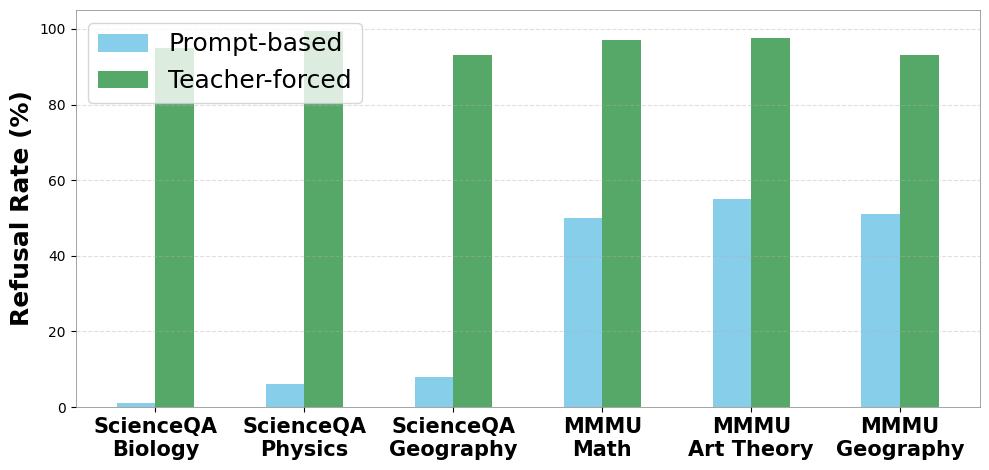

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# ----- data from your table -----
categories = [
    "ScienceQA\nBiology", "ScienceQA\nPhysics", "ScienceQA\nGeography",
    "MMMU\nMath", "MMMU\nArt Theory", "MMMU\nGeography"
]
prompt_based = np.array([1.0, 6.0, 8.0, 50.0, 55.0, 51.0])
teacher_forced = np.array([95.0, 99.5, 93.0, 97.0, 97.5, 93.0])

# ----- plot (grouped bars) -----
x = np.arange(len(categories))
width = 0.26

fig, ax = plt.subplots(figsize=(10, 4.8))

ax.bar(x - width/2, prompt_based, width, label="Prompt-based", color="#87CEEB")
ax.bar(x + width/2, teacher_forced, width, label="Teacher-forced", color="#55A867")

ax.set_ylabel("Refusal Rate (%)", fontsize=18, fontweight="bold")
# ax.set_xlabel("Dataset / Subject")
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=15, fontweight="bold")
ax.set_ylim(0, 105)

ax.legend(loc="upper left", fontsize=18)
ax.grid(axis="y", linestyle="--", alpha=0.4)

# 修改四周边框的粗细和颜色
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_linewidth(0.5)      # 设置边框粗细（默认是1）
    ax.spines[spine].set_color('gray')    # 设置边框颜色

# ax.set_title("Ablation: System Prompt-based vs Teacher-forced")

plt.tight_layout()
# plt.show()
plt.savefig("/home/ubuntu/jiaxi/results/teacher_ablation.pdf", dpi=300)